<a href="https://colab.research.google.com/github/repitta/CienciaDeDadosEducacionais/blob/master/An%C3%A1lise_Luana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# These are the library we are going to use
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#import numpy as np

In [0]:
# Notas finais
# Reading the data directly from the Git
notas_url = ["https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/dadosUFRN/notas_discentes_2017.1.csv",
            "https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/dadosUFRN/notas_discentes_2017.2.csv",
            "https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/dadosUFRN/notas_discentes_2018.1.csv",
            #"https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/dadosUFRN/notas_discentes_2018.2.csv"
            ]

In [0]:
# Notas since 2017.1 until 2018.2
notas2017_1 = pd.read_csv(notas_url[0], sep=';', encoding = "ISO-8859-1" )
notas2017_2 = pd.read_csv(notas_url[1], sep=';', encoding = "ISO-8859-1" )
notas2018_1 = pd.read_csv(notas_url[2], sep=';', encoding = "ISO-8859-1" )
#notas2018_2 = pd.read_csv(notas_url[3], sep=';', encoding = "ISO-8859-1" )

In [0]:
# Setting priginal data into one vector due to easier manipulation
classes =[notas2017_1, notas2017_2,notas2018_1,# notas2018_2
         ]

In [0]:
# Adding year in each dataframe 
year = 2017 # The year we decide to start our study
for i in range(3):
  classes[i]['ano'] = year
  if i%2!=0:
    year += 1
  
# Renaming the column for better manipulation
  classes[i].rename(columns={'nome': 'disciplina'}, inplace=True)
  

In [6]:
for i in range(3):
  # Changing some columns types in this step
  classes[i].periodo   = classes[i].periodo.astype(str)
  classes[i].codigo    = classes[i].codigo.astype(str)
  classes[i].disciplina= classes[i].disciplina.astype(str)
  classes[i].turma     = classes[i].turma.astype(str)
  classes[i].siape     = classes[i].siape.astype(str)
  classes[i].horario   = classes[i].horario.astype(str)
  classes[i].matricula = classes[i].matricula.astype(int)
 #classes[i].nota      = classes[i].nota.astype(float) #Não pode converter pq os alunos indeferidos no campo nota tem o simbolo -
  classes[i].situacao  = classes[i].situacao.astype(str)
  classes[i].ano       = classes[i].ano.astype(str)

# Filtro para os dados apenas da disciplina do codigo que tu selecionou
  classes[i] = classes[i][classes[i]['situacao'] !='EXCLUIDA']
  
  #Concatenar as colunas ano e periodo
  classes[i].ano = classes[i]['ano'] + "." + classes[i]['periodo']
  # transformar a tipo da coluna ano 
  classes[i].ano       = classes[i].ano.astype(float)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
#gerar os arquivos com as notas de cada disciplina
cod_dis = ["ECT2101","ECT2102", "ECT2103","ECT2104", "ECT2105","ECT2106"]

#Para os semestres 2017.1 e 2017.2
for cod in cod_dis :
  csv20171 = classes[0][classes[0]['codigo']==cod]
  csv20171.to_csv(r'20171'+cod+'.csv')

csv20172 = classes[1][classes[1]['codigo']=="ECT2203"]
csv20172.to_csv(r'20172ECT2203.csv')

#para os semestres 2017.2 e 2018.1

for cod in cod_dis :
  csv20172 = classes[1][classes[1]['codigo']==cod]
  csv20172.to_csv(r'20172'+cod+'.csv')

csv20181 = classes[2][classes[2]['codigo']=="ECT2203"]
csv20181.to_csv(r'20181ECT2203.csv')

#merge_classesCopy = merge_classes[merge_classes['codigo']=="ECT2106"]
#merge_classesCopy = merge_classesCopy[["matricula","disciplina","nota","ano","situacao"]]
#criar o arquivo csv por disciplina.. aqui tu tem q ficar mudando o nome do arquivo
#merge_classesCopy.to_csv(r'ECT2106.csv')





In [0]:
# aqui tu vai colocar o nome de todos os aquivos que tu gerou
notas_url_2017 = ["20171ECT2101.csv","20171ECT2102.csv", "20171ECT2103.csv","20171ECT2104.csv", "20171ECT2105.csv","20171ECT2106.csv","20172ECT2203.csv"]
notas_url_2018 = ["20172ECT2101.csv","20172ECT2102.csv", "20172ECT2103.csv","20172ECT2104.csv", "20172ECT2105.csv","20172ECT2106.csv","20181ECT2203.csv"]

In [0]:
# Notas since 2017.1 until 2017.2
notas_1 = pd.read_csv(notas_url_2017 [0] )
notas_2 = pd.read_csv(notas_url_2017 [1] )
notas_3 = pd.read_csv(notas_url_2017 [2] )
notas_4 = pd.read_csv(notas_url_2017 [3] )
notas_5 = pd.read_csv(notas_url_2017 [4] )
notas_6 = pd.read_csv(notas_url_2017 [5] )
notas_7 = pd.read_csv(notas_url_2017 [6] )
# aqui tu vai adicionar uma variavel para cada arquivo que tu cirar

# Setting priginal data into one vector due to easier manipulation, aqui tu vai adicionar todas a variaveis
notas2017 =[notas_1, notas_2,notas_3, notas_4,notas_5, notas_6,notas_7]

# Notas since 2017.2 until 2018.1
notas_1 = pd.read_csv(notas_url_2018 [0] )
notas_2 = pd.read_csv(notas_url_2018 [1] )
notas_3 = pd.read_csv(notas_url_2018 [2] )
notas_4 = pd.read_csv(notas_url_2018 [3] )
notas_5 = pd.read_csv(notas_url_2018 [4] )
notas_6 = pd.read_csv(notas_url_2018 [5] )
notas_7 = pd.read_csv(notas_url_2018 [6] )
# aqui tu vai adicionar uma variavel para cada arquivo que tu cirar

# Setting priginal data into one vector due to easier manipulation, aqui tu vai adicionar todas a variaveis
notas2018 =[notas_1, notas_2,notas_3, notas_4,notas_5, notas_6,notas_7]

In [10]:
# Concatenating all notas
merge_notas2017 = notas2017[0]
for i in range(1,7):
  merge_notas2017 = pd.concat([merge_notas2017, notas2017[i]], ignore_index=True)
merge_notas2017

# Concatenating all notas
merge_notas2018 = notas2018[0]
for i in range(1,7):
  merge_notas2018 = pd.concat([merge_notas2018, notas2018[i]], ignore_index=True)
merge_notas2018

,Unnamed: 0,periodo,codigo,disciplina,turma,siape,horario,matricula,nota,situacao,ano
0,12,2,ECT2101,PRÉ-CÁLCULO,1,3550015-0,2356T12 (24/07/2017 - 30/09/2017),20170148556,6.30,REPROVADO POR NOTA,2017.2
1,48,2,ECT2101,PRÉ-CÁLCULO,1,3550015-0,2356T12 (24/07/2017 - 30/09/2017),20170148716,-,DESISTENCIA,2017.2
2,54,2,ECT2101,PRÉ-CÁLCULO,4,1753234-7,2356N12 (24/07/2017 - 30/09/2017),20170148752,-,DESISTENCIA,2017.2
3,78,2,ECT2101,PRÉ-CÁLCULO,4,1753234-7,2356N12 (24/07/2017 - 30/09/2017),20170148912,-,TRANCADO,2017.2
4,96,2,ECT2101,PRÉ-CÁLCULO,1,3550015-0,2356T12 (24/07/2017 - 30/09/2017),20170148995,8.80,APROVADO,2017.2
5,102,2,ECT2101,PRÉ-CÁLCULO,4,1753234-7,2356N12 (24/07/2017 - 30/09/2017),20170149016,-,DESISTENCIA,2017.2
6,132,2,ECT2101,PRÉ-CÁLCULO,4,1753234-7,2356N12 (24/07/2017 - 30/09/2017),20170149132,-,DESISTENCIA,2017.2
7,138,2,ECT2101,PRÉ-CÁLCULO,1,3550015-0,2356T12 (24/07/2017 - 30/09/2017),20170149150,-,DESISTENCIA,2017.2
8,150,2,ECT2101,PRÉ-CÁLCULO,4,1753234-7,2356N12 (24/07/2017 - 30/09/2017),20170149277,-,CANCELADO,2017.2
9,162,2,ECT2101,PRÉ-CÁLCULO,4,1753234-7,2356N12 (24/07/2017 - 30/09/2017),20170149310,7.50,APROVADO,2017.2


In [11]:
disciplinas = merge_notas2017["disciplina"].unique()
colunas    = ["matricula"]
tabela2017= pd.DataFrame(columns=colunas)
for i in disciplinas:
  notasTurma = merge_notas2017.loc[merge_notas2017["disciplina"].str.contains(i, regex=False),["matricula","disciplina","ano","nota","situacao"]]
  notasTurma = notasTurma.sort_values("matricula")
  tabela2017 = pd.merge(notasTurma,tabela2017,on=['matricula'], how="outer") 


tabela2017.columns = ['matricula', disciplinas[6],disciplinas[6]+"ano",disciplinas[6]+"nota",disciplinas[6]+"situacao",
                 disciplinas[5],disciplinas[5]+"ano",disciplinas[5]+"nota",disciplinas[5]+"situacao", 
                 disciplinas[4],disciplinas[4]+"ano",disciplinas[4]+"nota",disciplinas[4]+"situacao",
                 disciplinas[3],disciplinas[3]+"ano",disciplinas[3]+"nota",disciplinas[3]+"situacao",
                 disciplinas[2],disciplinas[2]+"ano",disciplinas[2]+"nota",disciplinas[2]+"situacao",
                 disciplinas[1],disciplinas[1]+"ano",disciplinas[1]+"nota",disciplinas[1]+"situacao",
                 disciplinas[0],disciplinas[0]+"ano",disciplinas[0]+"nota",disciplinas[0]+"situacao"]


tabela2017 = tabela2017.drop_duplicates()
tabela2017 = tabela2017.sort_values('matricula')
tabela2017


disciplinas = merge_notas2018["disciplina"].unique()
colunas    = ["matricula"]
tabela2018= pd.DataFrame(columns=colunas)
for i in disciplinas:
  notasTurma = merge_notas2018.loc[merge_notas2017["disciplina"].str.contains(i, regex=False),["matricula","disciplina","ano","nota","situacao"]]
  notasTurma = notasTurma.sort_values("matricula")
  tabela2018 = pd.merge(notasTurma,tabela2018,on=['matricula'], how="outer") 


tabela2018.columns = ['matricula', disciplinas[6],disciplinas[6]+"ano",disciplinas[6]+"nota",disciplinas[6]+"situacao",
                 disciplinas[5],disciplinas[5]+"ano",disciplinas[5]+"nota",disciplinas[5]+"situacao", 
                 disciplinas[4],disciplinas[4]+"ano",disciplinas[4]+"nota",disciplinas[4]+"situacao",
                 disciplinas[3],disciplinas[3]+"ano",disciplinas[3]+"nota",disciplinas[3]+"situacao",
                 disciplinas[2],disciplinas[2]+"ano",disciplinas[2]+"nota",disciplinas[2]+"situacao",
                 disciplinas[1],disciplinas[1]+"ano",disciplinas[1]+"nota",disciplinas[1]+"situacao",
                 disciplinas[0],disciplinas[0]+"ano",disciplinas[0]+"nota",disciplinas[0]+"situacao"]


tabela2018 = tabela2018.drop_duplicates()
tabela2018 = tabela2018.sort_values('matricula')
tabela2018
  

,matricula,LÓGICA DE PROGRAMAÇÃO,LÓGICA DE PROGRAMAÇÃOano,LÓGICA DE PROGRAMAÇÃOnota,LÓGICA DE PROGRAMAÇÃOsituacao,"CIÊNCIA, TECNOLOGIA E SOCIEDADE","CIÊNCIA, TECNOLOGIA E SOCIEDADEano","CIÊNCIA, TECNOLOGIA E SOCIEDADEnota","CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao",PRÁTICAS DE LEITURA E ESCRITA I,PRÁTICAS DE LEITURA E ESCRITA Iano,PRÁTICAS DE LEITURA E ESCRITA Inota,PRÁTICAS DE LEITURA E ESCRITA Isituacao,QUÍMICA GERAL,QUÍMICA GERALano,QUÍMICA GERALnota,QUÍMICA GERALsituacao,CÁLCULO I,CÁLCULO Iano,CÁLCULO Inota,CÁLCULO Isituacao,VETORES E GEOMETRIA ANALÍTICA,VETORES E GEOMETRIA ANALÍTICAano,VETORES E GEOMETRIA ANALÍTICAnota,VETORES E GEOMETRIA ANALÍTICAsituacao,PRÉ-CÁLCULO,PRÉ-CÁLCULOano,PRÉ-CÁLCULOnota,PRÉ-CÁLCULOsituacao
3726,2012037965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VETORES E GEOMETRIA ANALÍTICA,2017.2,-,CANCELADO,NaN,NaN,NaN,NaN
3377,2012924133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VETORES E GEOMETRIA ANALÍTICA,2017.2,0.70,REPROVADO POR MÉDIA E POR FALTAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3727,2012927583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VETORES E GEOMETRIA ANALÍTICA,2017.2,0.50,REPROVADO POR MÉDIA E POR FALTAS,NaN,NaN,NaN,NaN
0,2012927879,LÓGICA DE PROGRAMAÇÃO,2018.1,-,INDEFERIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012927879,LÓGICA DE PROGRAMAÇÃO,2018.1,0.00,REPROVADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3379,2013019649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CÁLCULO I,2017.2,-,INDEFERIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3378,2013019649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CÁLCULO I,2017.2,1.70,REPROVADO POR MÉDIA E POR FALTAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3728,2013022500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VETORES E GEOMETRIA ANALÍTICA,2017.2,-,INDEFERIDO,NaN,NaN,NaN,NaN
2764,2013023580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CÁLCULO I,2017.2,0.50,CANCELADO,CÁLCULO I,2017.2,-,INDEFERIDO,PRÉ-CÁLCULO,2017.2,0.10,CANCELADO,PRÉ-CÁLCULO,2017.2,-,INDEFERIDO
2765,2013023580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CÁLCULO I,2017.2,0.50,CANCELADO,CÁLCULO I,2017.2,-,INDEFERIDO,PRÉ-CÁLCULO,2017.2,-,INDEFERIDO,PRÉ-CÁLCULO,2017.2,-,INDEFERIDO


In [0]:
#Tabela só com os registros de quem cursou as cinco disciplinas em 2017.1 e também cursou LOP em 2017.2
tabela12017 = tabela2017.dropna(subset=["LÓGICA DE PROGRAMAÇÃO"])
tabela12017 = tabela12017.sort_values('matricula')

#Tabela só com os registros de quem cursou as cinco disciplinas em 2017.2 e também cursou LOP em 2018.1
tabela12018 = tabela2018.dropna(subset=["LÓGICA DE PROGRAMAÇÃO"])
tabela12018 = tabela12018.sort_values('matricula')


In [13]:
#Em 2017.2 tivemos 806 ocorrências da disciplina de LOP
tabela12017.info()

#em 2017.2 tivemos 574 alunos que fizeram a disciplina de LOP
tabela12017.matricula.unique().shape
# Esses números tem essa diferença pois o aluno pode esta com status diferente para uma das 6 disicplinas que estão sendo análisadas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 0 to 1007
Data columns (total 29 columns):
matricula                                  806 non-null int64
LÓGICA DE PROGRAMAÇÃO                      806 non-null object
LÓGICA DE PROGRAMAÇÃOano                   806 non-null float64
LÓGICA DE PROGRAMAÇÃOnota                  806 non-null object
LÓGICA DE PROGRAMAÇÃOsituacao              806 non-null object
CIÊNCIA, TECNOLOGIA E SOCIEDADE            406 non-null object
CIÊNCIA, TECNOLOGIA E SOCIEDADEano         406 non-null float64
CIÊNCIA, TECNOLOGIA E SOCIEDADEnota        406 non-null object
CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao    406 non-null object
PRÁTICAS DE LEITURA E ESCRITA I            374 non-null object
PRÁTICAS DE LEITURA E ESCRITA Iano         374 non-null float64
PRÁTICAS DE LEITURA E ESCRITA Inota        374 non-null object
PRÁTICAS DE LEITURA E ESCRITA Isituacao    374 non-null object
QUÍMICA GERAL                              521 non-null object
QUÍMICA GE

(574,)

In [0]:
#verificar quais os alunos estão com o status de cancelado

#Em 2017.2 132 alunos cancelaram a disciplina de LOP
#tabela1[tabela1["LÓGICA DE PROGRAMAÇÃOsituacao"] == "CANCELADO"].shape

#Em 2017.1 6 alunos cancelaram a disciplina de CIÊNCIA, TECNOLOGIA E SOCIEDADE e tentaram fazer matricula em LOP em 2017.2
#tabela1[tabela1["CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao"] == "CANCELADO"].shape

#Em 2017.1  2 alunos cancelarm a disciplina de PRÁTICAS DE LEITURA E ESCRITA I e tentaram fazer matricula em LOP em 2017.2
#tabela1[tabela1["PRÁTICAS DE LEITURA E ESCRITA Isituacao"] == "CANCELADO"].shape

#Em 2017.1 16 alunos cancelaram a disciplina de  Química Geral e tentaram fazer a matriucla em LOP em 2017.2 
#tabela1[tabela1["QUÍMICA GERALsituacao"] == "CANCELADO"].shape

#Em 2017.1 30 alunos cancelaram a discipina de CÁLCULO I e tentaram fazer matricula em LOP em 2017.2
#tabela1[tabela1["CÁLCULO Isituacao"] == "CANCELADO"].shape

#Em 2017.1 42 alunos cancelaram a discipina de VETORES E GEOMETRIA ANALÍTICA e tentaram fazer matricula em LOP em 2017.2
#tabela1[tabela1["VETORES E GEOMETRIA ANALÍTICAsituacao"] == "CANCELADO"].shape



In [14]:
#tabela só com os alumos que cursaram, todas as disciplinas em 2017.1 e LOP em 2017.2
tabela22017 = tabela12017.dropna()
tabela22018 = tabela12018.dropna()

#Dos 806 registros apenas 316 fizeram todas as disciplinas em 2017.1 e cursaram LOP em 2017.2
tabela22017.info()
tabela22018.info()

#Dos 316 registros temos 259 alunos distintos, esse número é diferente pq tem aluno com status diferente em alguma das 6 disciplinas
tabela22017.matricula.unique().shape
tabela22018.matricula.unique().shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 184 to 1001
Data columns (total 29 columns):
matricula                                  316 non-null int64
LÓGICA DE PROGRAMAÇÃO                      316 non-null object
LÓGICA DE PROGRAMAÇÃOano                   316 non-null float64
LÓGICA DE PROGRAMAÇÃOnota                  316 non-null object
LÓGICA DE PROGRAMAÇÃOsituacao              316 non-null object
CIÊNCIA, TECNOLOGIA E SOCIEDADE            316 non-null object
CIÊNCIA, TECNOLOGIA E SOCIEDADEano         316 non-null float64
CIÊNCIA, TECNOLOGIA E SOCIEDADEnota        316 non-null object
CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao    316 non-null object
PRÁTICAS DE LEITURA E ESCRITA I            316 non-null object
PRÁTICAS DE LEITURA E ESCRITA Iano         316 non-null float64
PRÁTICAS DE LEITURA E ESCRITA Inota        316 non-null object
PRÁTICAS DE LEITURA E ESCRITA Isituacao    316 non-null object
QUÍMICA GERAL                              316 non-null object
QUÍMICA 

(262,)

In [0]:
#tabela2["LÓGICA DE PROGRAMAÇÃOsituacao"].unique()

In [0]:
#tabela2["CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao"].unique()

In [0]:
#tabela2["QUÍMICA GERALsituacao"].unique()

In [0]:
#tabela2["CÁLCULO Isituacao"].unique()

In [0]:
#tabela2["VETORES E GEOMETRIA ANALÍTICAsituacao"].unique() 

In [0]:
#tabela2["PRÉ-CÁLCULOsituacao"].unique()

In [21]:
#Alunos com status diferentes nas disciplinas

quantidade = tabela22017.groupby("matricula").count()
lista_matricula = quantidade.loc[quantidade["LÓGICA DE PROGRAMAÇÃO"] != 1].index
#lista_matricula


for mat in lista_matricula :
  tabela_remover = tabela22017.loc[ (tabela22017["matricula"] == mat) & ( (tabela22017["LÓGICA DE PROGRAMAÇÃOsituacao"] == "INDEFERIDO") | (tabela22017["LÓGICA DE PROGRAMAÇÃOsituacao"] == "DESISTENCIA")) ]
  tabela22017 = tabela22017.drop(tabela_remover.index)
  
quantidade1 = tabela22017.groupby("matricula").count()
lista_matricula1 = quantidade1.loc[quantidade1["LÓGICA DE PROGRAMAÇÃO"] != 1].index
print("2017") 
print(lista_matricula1 )

quantidade = tabela22018.groupby("matricula").count()
lista_matricula = quantidade.loc[quantidade["LÓGICA DE PROGRAMAÇÃO"] != 1].index
#lista_matricula

for mat in lista_matricula :
  tabela_remover = tabela22018.loc[ (tabela22018["matricula"] == mat) & ( (tabela22018["LÓGICA DE PROGRAMAÇÃOsituacao"] == "INDEFERIDO") | (tabela22018["LÓGICA DE PROGRAMAÇÃOsituacao"] == "DESISTENCIA")) ]
  tabela22018 = tabela22018.drop(tabela_remover.index)
  
quantidade1 = tabela22018.groupby("matricula").count()
lista_matricula1 = quantidade1.loc[quantidade1["LÓGICA DE PROGRAMAÇÃO"] != 1].index
print("2018")
print(lista_matricula1) 



2017
Int64Index([2016097406, 20170034457, 20170038732], dtype='int64', name='matricula')
2018
Int64Index([20160158325, 20170032891, 20170041738, 20170117907, 20170118127,
            20170137650, 20170148242],
           dtype='int64', name='matricula')


In [22]:
tabela22018[tabela22018["matricula"] == 20170041738]

,matricula,LÓGICA DE PROGRAMAÇÃO,LÓGICA DE PROGRAMAÇÃOano,LÓGICA DE PROGRAMAÇÃOnota,LÓGICA DE PROGRAMAÇÃOsituacao,"CIÊNCIA, TECNOLOGIA E SOCIEDADE","CIÊNCIA, TECNOLOGIA E SOCIEDADEano","CIÊNCIA, TECNOLOGIA E SOCIEDADEnota","CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao",PRÁTICAS DE LEITURA E ESCRITA I,PRÁTICAS DE LEITURA E ESCRITA Iano,PRÁTICAS DE LEITURA E ESCRITA Inota,PRÁTICAS DE LEITURA E ESCRITA Isituacao,QUÍMICA GERAL,QUÍMICA GERALano,QUÍMICA GERALnota,QUÍMICA GERALsituacao,CÁLCULO I,CÁLCULO Iano,CÁLCULO Inota,CÁLCULO Isituacao,VETORES E GEOMETRIA ANALÍTICA,VETORES E GEOMETRIA ANALÍTICAano,VETORES E GEOMETRIA ANALÍTICAnota,VETORES E GEOMETRIA ANALÍTICAsituacao,PRÉ-CÁLCULO,PRÉ-CÁLCULOano,PRÉ-CÁLCULOnota,PRÉ-CÁLCULOsituacao
773,20170041738,LÓGICA DE PROGRAMAÇÃO,2018.1,0.70,REPROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.2,0.50,CANCELADO,PRÁTICAS DE LEITURA E ESCRITA I,2017.2,0.40,CANCELADO,QUÍMICA GERAL,2017.2,-,DESISTENCIA,CÁLCULO I,2017.2,0.00,CANCELADO,VETORES E GEOMETRIA ANALÍTICA,2017.2,-,DESISTENCIA,PRÉ-CÁLCULO,2017.2,0.00,CANCELADO
778,20170041738,LÓGICA DE PROGRAMAÇÃO,2018.1,0.70,REPROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.2,0.50,CANCELADO,PRÁTICAS DE LEITURA E ESCRITA I,2017.2,-,DESISTENCIA,QUÍMICA GERAL,2017.2,-,DESISTENCIA,CÁLCULO I,2017.2,0.00,CANCELADO,VETORES E GEOMETRIA ANALÍTICA,2017.2,0.00,CANCELADO,PRÉ-CÁLCULO,2017.2,0.00,CANCELADO
777,20170041738,LÓGICA DE PROGRAMAÇÃO,2018.1,0.70,REPROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.2,0.50,CANCELADO,PRÁTICAS DE LEITURA E ESCRITA I,2017.2,-,DESISTENCIA,QUÍMICA GERAL,2017.2,-,DESISTENCIA,CÁLCULO I,2017.2,0.00,CANCELADO,VETORES E GEOMETRIA ANALÍTICA,2017.2,-,DESISTENCIA,PRÉ-CÁLCULO,2017.2,0.00,CANCELADO
776,20170041738,LÓGICA DE PROGRAMAÇÃO,2018.1,0.70,REPROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.2,0.50,CANCELADO,PRÁTICAS DE LEITURA E ESCRITA I,2017.2,0.40,CANCELADO,QUÍMICA GERAL,2017.2,1.40,CANCELADO,CÁLCULO I,2017.2,0.00,CANCELADO,VETORES E GEOMETRIA ANALÍTICA,2017.2,0.00,CANCELADO,PRÉ-CÁLCULO,2017.2,0.00,CANCELADO
774,20170041738,LÓGICA DE PROGRAMAÇÃO,2018.1,0.70,REPROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.2,0.50,CANCELADO,PRÁTICAS DE LEITURA E ESCRITA I,2017.2,0.40,CANCELADO,QUÍMICA GERAL,2017.2,-,DESISTENCIA,CÁLCULO I,2017.2,0.00,CANCELADO,VETORES E GEOMETRIA ANALÍTICA,2017.2,0.00,CANCELADO,PRÉ-CÁLCULO,2017.2,0.00,CANCELADO
779,20170041738,LÓGICA DE PROGRAMAÇÃO,2018.1,0.70,REPROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.2,0.50,CANCELADO,PRÁTICAS DE LEITURA E ESCRITA I,2017.2,-,DESISTENCIA,QUÍMICA GERAL,2017.2,1.40,CANCELADO,CÁLCULO I,2017.2,0.00,CANCELADO,VETORES E GEOMETRIA ANALÍTICA,2017.2,-,DESISTENCIA,PRÉ-CÁLCULO,2017.2,0.00,CANCELADO
775,20170041738,LÓGICA DE PROGRAMAÇÃO,2018.1,0.70,REPROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.2,0.50,CANCELADO,PRÁTICAS DE LEITURA E ESCRITA I,2017.2,0.40,CANCELADO,QUÍMICA GERAL,2017.2,1.40,CANCELADO,CÁLCULO I,2017.2,0.00,CANCELADO,VETORES E GEOMETRIA ANALÍTICA,2017.2,-,DESISTENCIA,PRÉ-CÁLCULO,2017.2,0.00,CANCELADO
780,20170041738,LÓGICA DE PROGRAMAÇÃO,2018.1,0.70,REPROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.2,0.50,CANCELADO,PRÁTICAS DE LEITURA E ESCRITA I,2017.2,-,DESISTENCIA,QUÍMICA GERAL,2017.2,1.40,CANCELADO,CÁLCULO I,2017.2,0.00,CANCELADO,VETORES E GEOMETRIA ANALÍTICA,2017.2,0.00,CANCELADO,PRÉ-CÁLCULO,2017.2,0.00,CANCELADO


In [23]:
tabela_remover = tabela22017.loc[ (tabela22017["matricula"] == 2016097406) & (tabela22017["PRÁTICAS DE LEITURA E ESCRITA Isituacao"] == "INDEFERIDO") ]
tabela22017 = tabela22017.drop(tabela_remover.index)
tabela_remover = tabela22017.loc[ (tabela22017["matricula"] == 2016097406) &  ( (tabela22017["QUÍMICA GERALsituacao"] == "INDEFERIDO") | (tabela22017["QUÍMICA GERALsituacao"] == "DESISTENCIA"))]
tabela22017 = tabela22017.drop(tabela_remover.index)
tabela_remover = tabela22017.loc[ (tabela22017["matricula"] == 2016097406) &  (tabela22017["VETORES E GEOMETRIA ANALÍTICAsituacao"] == "DESISTENCIA")]
tabela22017 = tabela22017.drop(tabela_remover.index)

tabela22017[tabela22017["matricula"] == 2016097406]

,matricula,LÓGICA DE PROGRAMAÇÃO,LÓGICA DE PROGRAMAÇÃOano,LÓGICA DE PROGRAMAÇÃOnota,LÓGICA DE PROGRAMAÇÃOsituacao,"CIÊNCIA, TECNOLOGIA E SOCIEDADE","CIÊNCIA, TECNOLOGIA E SOCIEDADEano","CIÊNCIA, TECNOLOGIA E SOCIEDADEnota","CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao",PRÁTICAS DE LEITURA E ESCRITA I,PRÁTICAS DE LEITURA E ESCRITA Iano,PRÁTICAS DE LEITURA E ESCRITA Inota,PRÁTICAS DE LEITURA E ESCRITA Isituacao,QUÍMICA GERAL,QUÍMICA GERALano,QUÍMICA GERALnota,QUÍMICA GERALsituacao,CÁLCULO I,CÁLCULO Iano,CÁLCULO Inota,CÁLCULO Isituacao,VETORES E GEOMETRIA ANALÍTICA,VETORES E GEOMETRIA ANALÍTICAano,VETORES E GEOMETRIA ANALÍTICAnota,VETORES E GEOMETRIA ANALÍTICAsituacao,PRÉ-CÁLCULO,PRÉ-CÁLCULOano,PRÉ-CÁLCULOnota,PRÉ-CÁLCULOsituacao
319,2016097406,LÓGICA DE PROGRAMAÇÃO,2017.2,0.70,REPROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.1,1.30,REPROVADO POR MÉDIA E POR FALTAS,PRÁTICAS DE LEITURA E ESCRITA I,2017.1,2.10,REPROVADO,QUÍMICA GERAL,2017.1,5.10,APROVADO POR NOTA,CÁLCULO I,2017.1,0.20,REPROVADO POR MÉDIA E POR FALTAS,VETORES E GEOMETRIA ANALÍTICA,2017.1,5.00,REPROVADO POR NOTA,PRÉ-CÁLCULO,2017.1,6.30,APROVADO POR NOTA


In [24]:
tabela_remover = tabela22017.loc[  ( (tabela22017["matricula"] == 20170034457)  | (tabela22017["matricula"] == 20170038732)) & (tabela22017["PRÁTICAS DE LEITURA E ESCRITA Isituacao"] == "DESISTENCIA") ]
tabela22017 = tabela22017.drop(tabela_remover.index)
tabela22017[tabela22017["matricula"] == 20170034457] 
tabela22017[tabela22017["matricula"] == 20170038732]

,matricula,LÓGICA DE PROGRAMAÇÃO,LÓGICA DE PROGRAMAÇÃOano,LÓGICA DE PROGRAMAÇÃOnota,LÓGICA DE PROGRAMAÇÃOsituacao,"CIÊNCIA, TECNOLOGIA E SOCIEDADE","CIÊNCIA, TECNOLOGIA E SOCIEDADEano","CIÊNCIA, TECNOLOGIA E SOCIEDADEnota","CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao",PRÁTICAS DE LEITURA E ESCRITA I,PRÁTICAS DE LEITURA E ESCRITA Iano,PRÁTICAS DE LEITURA E ESCRITA Inota,PRÁTICAS DE LEITURA E ESCRITA Isituacao,QUÍMICA GERAL,QUÍMICA GERALano,QUÍMICA GERALnota,QUÍMICA GERALsituacao,CÁLCULO I,CÁLCULO Iano,CÁLCULO Inota,CÁLCULO Isituacao,VETORES E GEOMETRIA ANALÍTICA,VETORES E GEOMETRIA ANALÍTICAano,VETORES E GEOMETRIA ANALÍTICAnota,VETORES E GEOMETRIA ANALÍTICAsituacao,PRÉ-CÁLCULO,PRÉ-CÁLCULOano,PRÉ-CÁLCULOnota,PRÉ-CÁLCULOsituacao
867,20170038732,LÓGICA DE PROGRAMAÇÃO,2017.2,3.90,REPROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.1,8.20,APROVADO,PRÁTICAS DE LEITURA E ESCRITA I,2017.1,7.60,APROVADO,QUÍMICA GERAL,2017.1,-,DESISTENCIA,CÁLCULO I,2017.1,8.50,APROVADO,VETORES E GEOMETRIA ANALÍTICA,2017.1,7.60,APROVADO,PRÉ-CÁLCULO,2017.1,6.10,APROVADO POR NOTA


In [0]:
tabela_remover = tabela22018.loc[  ( (tabela22018["matricula"] == 20170148242)  | (tabela22018["matricula"] == 20170032891) | (tabela22018["matricula"] ==  20170117907)  | (tabela22018["matricula"] == 20170118127)) & (tabela22018["CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao"] == "INDEFERIDO") ]
tabela22018 = tabela22018.drop(tabela_remover.index) 


In [0]:
tabela_remover = tabela22018.loc[  ( (tabela22018["matricula"] == 20170137650)  & (tabela22018["QUÍMICA GERALsituacao"] == "DESISTENCIA")) ]
tabela22018 = tabela22018.drop(tabela_remover.index)

In [0]:
tabela_remover = tabela22018.loc[ (tabela22018["matricula"] == 20170041738) & (tabela22018["PRÁTICAS DE LEITURA E ESCRITA Isituacao"] == "DESISTENCIA") ]
tabela22018 = tabela22018.drop(tabela_remover.index)
tabela_remover = tabela22018.loc[ (tabela22018["matricula"] == 20170041738) &  (tabela22018["QUÍMICA GERALsituacao"] == "DESISTENCIA")]
tabela22018 = tabela22018.drop(tabela_remover.index)
tabela_remover = tabela22018.loc[ (tabela22018["matricula"] == 20170041738) &  (tabela22018["VETORES E GEOMETRIA ANALÍTICAsituacao"] == "DESISTENCIA")]
tabela22018 = tabela22018.drop(tabela_remover.index)

In [28]:
#temos 259 alunos com ocorrencias  nas cinco disciplinas em 2017.1 e tbm tem ocorrencia na disciplina de LOP em 2017.2
tabela22017.matricula.unique().shape

(259,)

In [29]:
tabela22018.matricula.unique().shape

(261,)

In [0]:
#concatenar as duas tabelas 2017 e 2018
tabela2 = pd.concat([tabela22017, tabela22018], ignore_index=True)

In [31]:
tabela2

,matricula,LÓGICA DE PROGRAMAÇÃO,LÓGICA DE PROGRAMAÇÃOano,LÓGICA DE PROGRAMAÇÃOnota,LÓGICA DE PROGRAMAÇÃOsituacao,"CIÊNCIA, TECNOLOGIA E SOCIEDADE","CIÊNCIA, TECNOLOGIA E SOCIEDADEano","CIÊNCIA, TECNOLOGIA E SOCIEDADEnota","CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao",PRÁTICAS DE LEITURA E ESCRITA I,PRÁTICAS DE LEITURA E ESCRITA Iano,PRÁTICAS DE LEITURA E ESCRITA Inota,PRÁTICAS DE LEITURA E ESCRITA Isituacao,QUÍMICA GERAL,QUÍMICA GERALano,QUÍMICA GERALnota,QUÍMICA GERALsituacao,CÁLCULO I,CÁLCULO Iano,CÁLCULO Inota,CÁLCULO Isituacao,VETORES E GEOMETRIA ANALÍTICA,VETORES E GEOMETRIA ANALÍTICAano,VETORES E GEOMETRIA ANALÍTICAnota,VETORES E GEOMETRIA ANALÍTICAsituacao,PRÉ-CÁLCULO,PRÉ-CÁLCULOano,PRÉ-CÁLCULOnota,PRÉ-CÁLCULOsituacao
0,2016015699,LÓGICA DE PROGRAMAÇÃO,2017.2,0.10,REPROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.1,2.10,CANCELADO,PRÁTICAS DE LEITURA E ESCRITA I,2017.1,4.20,CANCELADO,QUÍMICA GERAL,2017.1,0.50,CANCELADO,CÁLCULO I,2017.1,0.00,CANCELADO,VETORES E GEOMETRIA ANALÍTICA,2017.1,0.00,CANCELADO,PRÉ-CÁLCULO,2017.1,3.20,CANCELADO
1,2016097406,LÓGICA DE PROGRAMAÇÃO,2017.2,0.70,REPROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.1,1.30,REPROVADO POR MÉDIA E POR FALTAS,PRÁTICAS DE LEITURA E ESCRITA I,2017.1,2.10,REPROVADO,QUÍMICA GERAL,2017.1,5.10,APROVADO POR NOTA,CÁLCULO I,2017.1,0.20,REPROVADO POR MÉDIA E POR FALTAS,VETORES E GEOMETRIA ANALÍTICA,2017.1,5.00,REPROVADO POR NOTA,PRÉ-CÁLCULO,2017.1,6.30,APROVADO POR NOTA
2,20160142011,LÓGICA DE PROGRAMAÇÃO,2017.2,0.00,REPROVADO POR MÉDIA E POR FALTAS,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.1,1.10,REPROVADO,PRÁTICAS DE LEITURA E ESCRITA I,2017.1,0.60,REPROVADO POR MÉDIA E POR FALTAS,QUÍMICA GERAL,2017.1,0.00,REPROVADO POR MÉDIA E POR FALTAS,CÁLCULO I,2017.1,0.80,REPROVADO,VETORES E GEOMETRIA ANALÍTICA,2017.1,0.50,REPROVADO,PRÉ-CÁLCULO,2017.1,5.10,APROVADO POR NOTA
3,20160159117,LÓGICA DE PROGRAMAÇÃO,2017.2,0.00,CANCELADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.1,2.20,CANCELADO,PRÁTICAS DE LEITURA E ESCRITA I,2017.1,3.80,CANCELADO,QUÍMICA GERAL,2017.1,1.80,CANCELADO,CÁLCULO I,2017.1,0.80,CANCELADO,VETORES E GEOMETRIA ANALÍTICA,2017.1,0.60,CANCELADO,PRÉ-CÁLCULO,2017.1,3.70,CANCELADO
4,20160159180,LÓGICA DE PROGRAMAÇÃO,2017.2,0.00,CANCELADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.1,5.50,APROVADO POR NOTA,PRÁTICAS DE LEITURA E ESCRITA I,2017.1,5.20,APROVADO POR NOTA,QUÍMICA GERAL,2017.1,5.10,APROVADO POR NOTA,CÁLCULO I,2017.1,2.20,REPROVADO,VETORES E GEOMETRIA ANALÍTICA,2017.1,2.60,REPROVADO,PRÉ-CÁLCULO,2017.1,5.90,APROVADO POR NOTA
5,20170003414,LÓGICA DE PROGRAMAÇÃO,2017.2,7.20,APROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.1,7.10,APROVADO,PRÁTICAS DE LEITURA E ESCRITA I,2017.1,6.90,APROVADO POR NOTA,QUÍMICA GERAL,2017.1,8.30,APROVADO,CÁLCULO I,2017.1,0.20,REPROVADO POR MÉDIA E POR FALTAS,VETORES E GEOMETRIA ANALÍTICA,2017.1,6.10,APROVADO POR NOTA,PRÉ-CÁLCULO,2017.1,7.50,APROVADO
6,20170030494,LÓGICA DE PROGRAMAÇÃO,2017.2,1.00,REPROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.1,5.40,APROVADO POR NOTA,PRÁTICAS DE LEITURA E ESCRITA I,2017.1,5.70,APROVADO POR NOTA,QUÍMICA GERAL,2017.1,7.40,APROVADO,CÁLCULO I,2017.1,1.80,REPROVADO,VETORES E GEOMETRIA ANALÍTICA,2017.1,5.60,APROVADO POR NOTA,PRÉ-CÁLCULO,2017.1,5.40,APROVADO POR NOTA
7,20170030538,LÓGICA DE PROGRAMAÇÃO,2017.2,8.80,APROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.1,9.00,APROVADO,PRÁTICAS DE LEITURA E ESCRITA I,2017.1,6.00,APROVADO POR NOTA,QUÍMICA GERAL,2017.1,9.40,APROVADO,CÁLCULO I,2017.1,5.00,APROVADO POR NOTA,VETORES E GEOMETRIA ANALÍTICA,2017.1,8.60,APROVADO,PRÉ-CÁLCULO,2017.1,6.50,APROVADO POR NOTA
8,20170030556,LÓGICA DE PROGRAMAÇÃO,2017.2,8.20,APROVADO,"CIÊNCIA, TECNOLOGIA E SOCIEDADE",2017.1,6.90,APROVADO POR NOTA,PRÁTICAS DE LEITURA E ESCRITA I,2017.1,5.70,APROVADO POR NOTA,QUÍMICA GERAL,2017.1,6.10,APROVADO POR NOTA,CÁLCULO I,2017.1,4.30,REPROVADO,VETORES E GEOMETRIA ANALÍTICA,2017.1,0.90,REPROVADO,PRÉ-CÁLCULO,2017.1,0.60,REPROVADO
9,20170030618,LÓGICA DE PROGRAMAÇÃO,2017.2,9.80,APROVADO,"CIÊNCIA, TECNOLOGIA E SOC

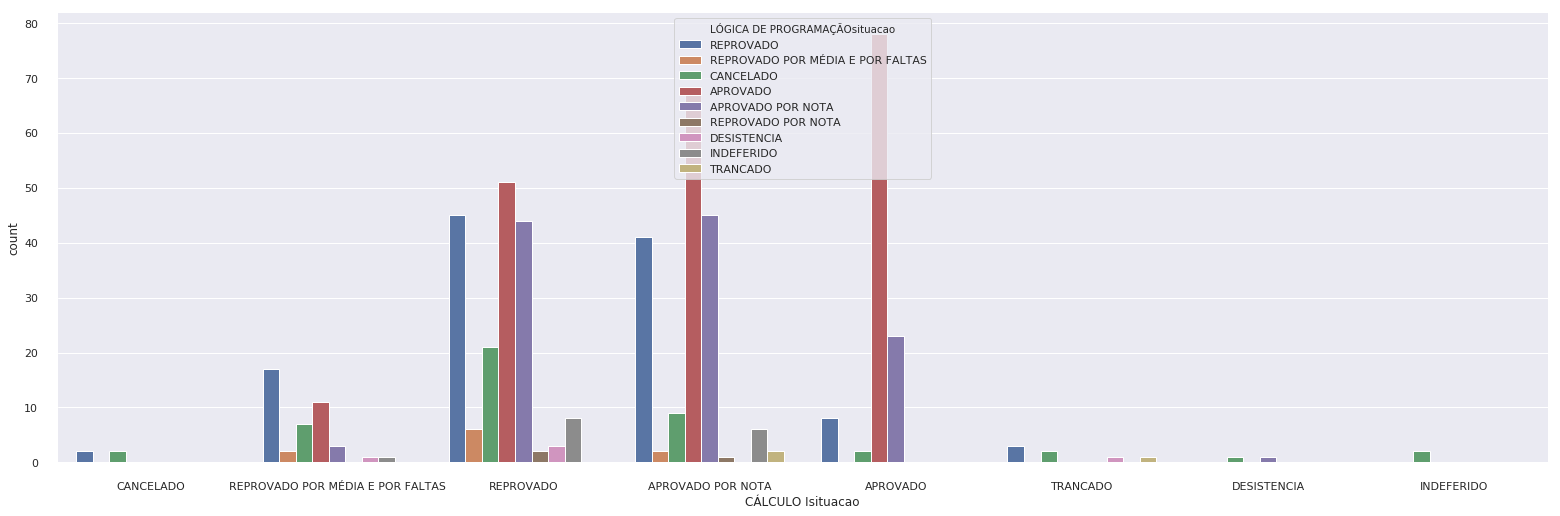

In [32]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(26.7,8.27)})
# create a countplot
sns.countplot('CÁLCULO Isituacao',data=tabela2,hue = 'LÓGICA DE PROGRAMAÇÃOsituacao')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
#display the plotplt.show()

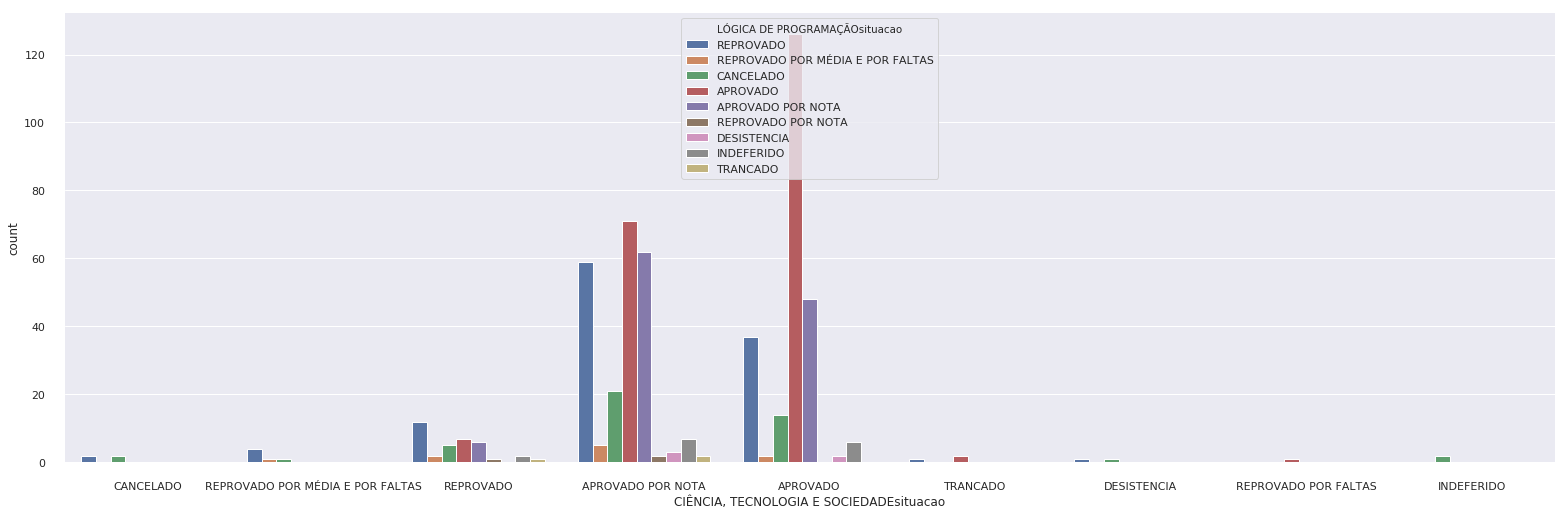

In [33]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(26.7,8.27)})
# create a countplot
sns.countplot('CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao',data=tabela2,hue = 'LÓGICA DE PROGRAMAÇÃOsituacao')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
#display the plotplt.show()

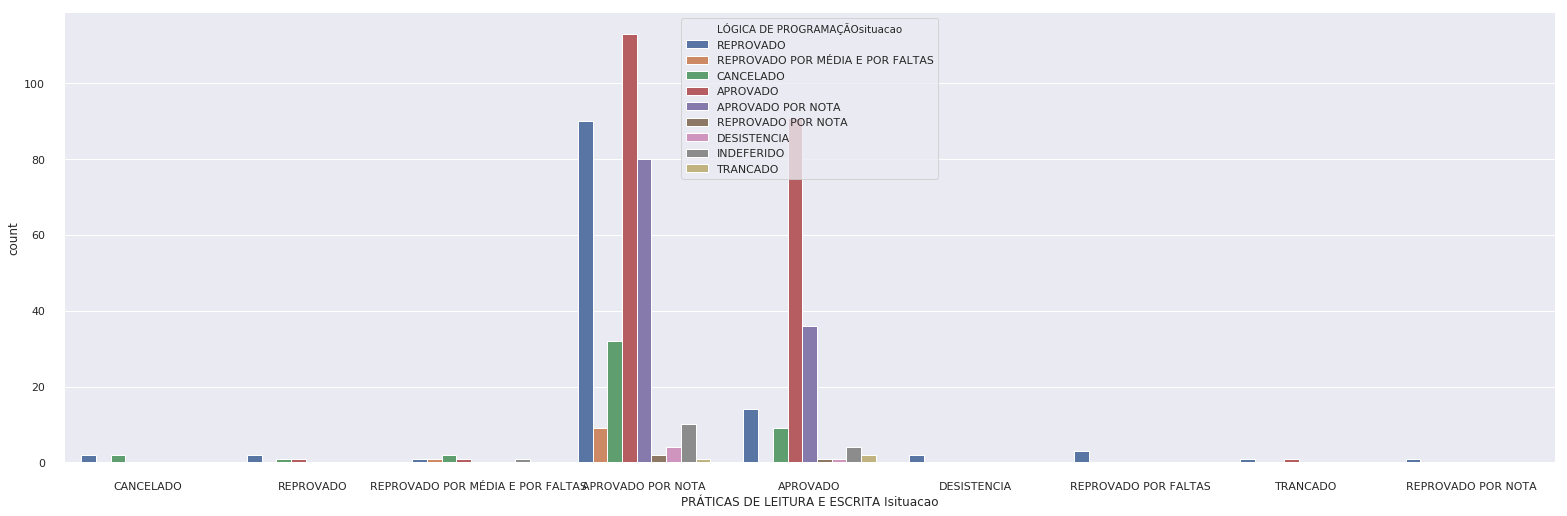

In [34]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(26.7,8.27)})
# create a countplot
sns.countplot('PRÁTICAS DE LEITURA E ESCRITA Isituacao',data=tabela2,hue = 'LÓGICA DE PROGRAMAÇÃOsituacao')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
#display the plotplt.show()

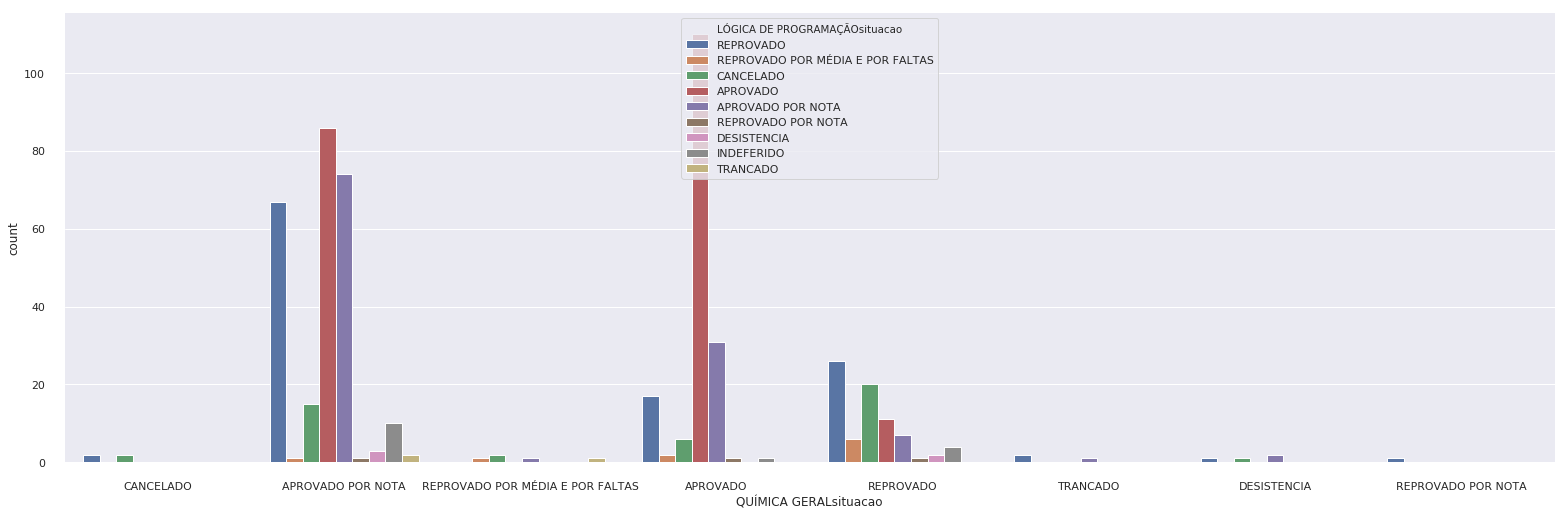

In [35]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(26.7,8.27)})
# create a countplot
sns.countplot('QUÍMICA GERALsituacao',data=tabela2,hue = 'LÓGICA DE PROGRAMAÇÃOsituacao')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
#display the plotplt.show()

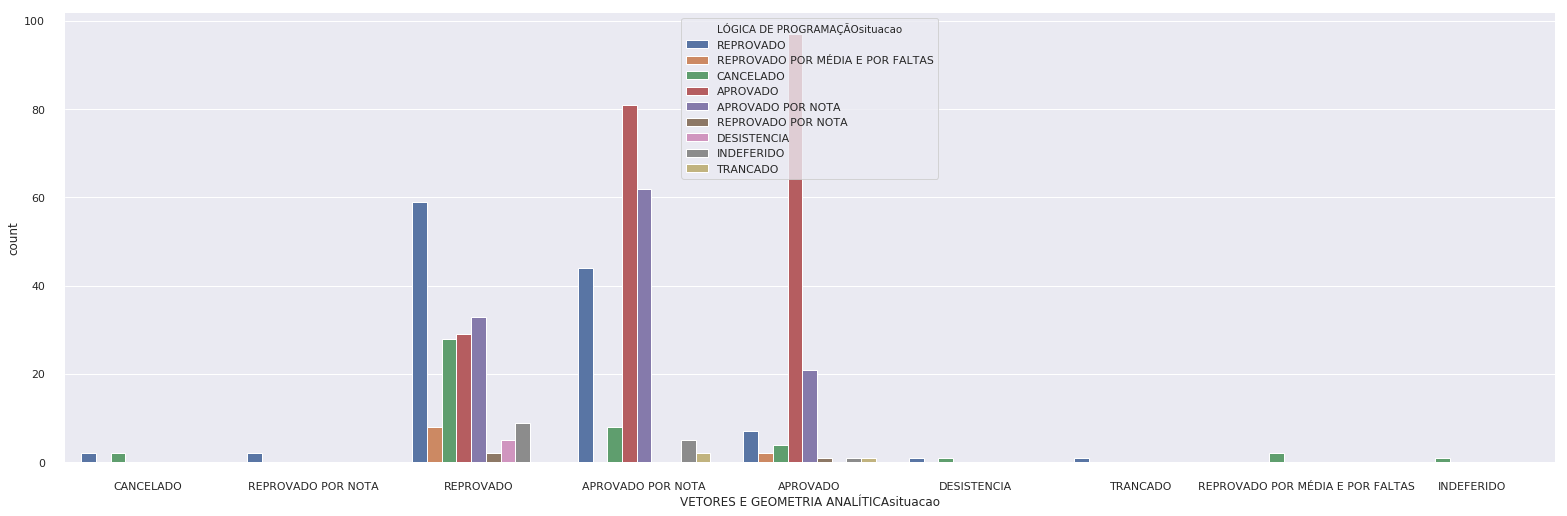

In [36]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(26.7,8.27)})
# create a countplot
sns.countplot('VETORES E GEOMETRIA ANALÍTICAsituacao',data=tabela2,hue = 'LÓGICA DE PROGRAMAÇÃOsituacao')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
#display the plotplt.show()

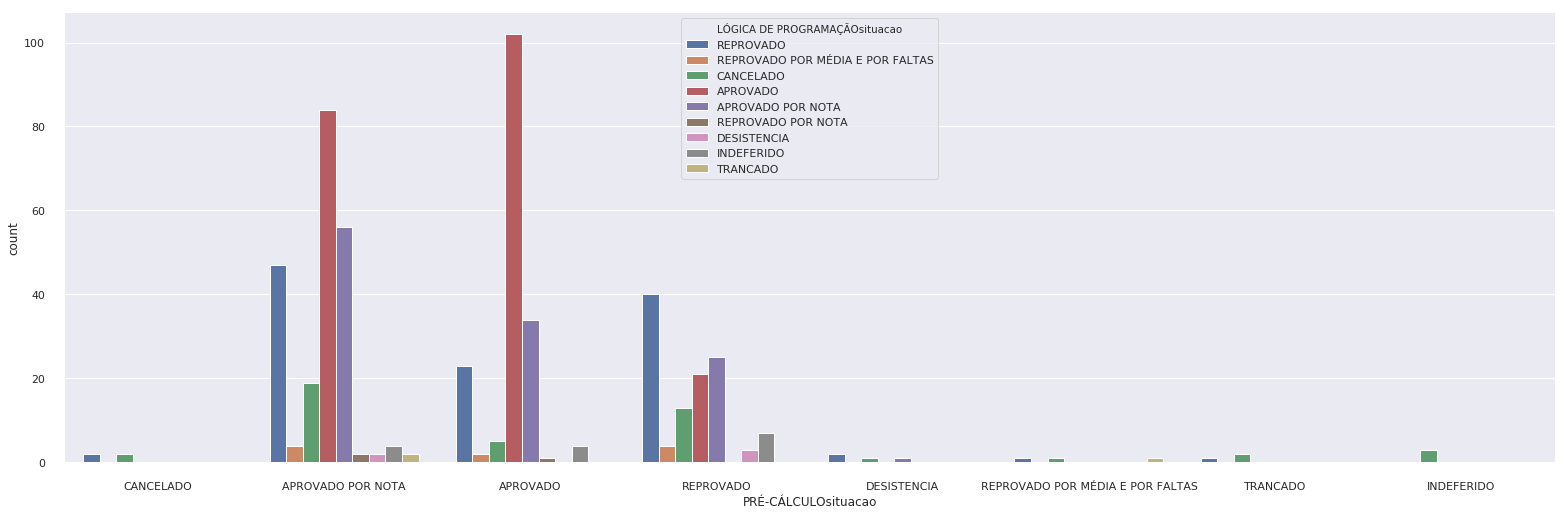

In [37]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(26.7,8.27)})
# create a countplot
sns.countplot('PRÉ-CÁLCULOsituacao',data=tabela2,hue = 'LÓGICA DE PROGRAMAÇÃOsituacao')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
#display the plotplt.show()

In [0]:
#Gráfica de correlação entre as disciplinas
datasetNotas = tabela2[['CIÊNCIA, TECNOLOGIA E SOCIEDADEnota', 'PRÁTICAS DE LEITURA E ESCRITA Inota', 'QUÍMICA GERALnota', 'CÁLCULO Inota',
                        'VETORES E GEOMETRIA ANALÍTICAnota', 'PRÉ-CÁLCULOnota','LÓGICA DE PROGRAMAÇÃOnota' ]]
datasetNotas = datasetNotas.replace("-",-1)
datasetNotas = datasetNotas.reset_index(drop = True)
datasetNotas = datasetNotas.astype(float)


In [39]:
datasetNotas.corr()

,"CIÊNCIA, TECNOLOGIA E SOCIEDADEnota",PRÁTICAS DE LEITURA E ESCRITA Inota,QUÍMICA GERALnota,CÁLCULO Inota,VETORES E GEOMETRIA ANALÍTICAnota,PRÉ-CÁLCULOnota,LÓGICA DE PROGRAMAÇÃOnota
"CIÊNCIA, TECNOLOGIA E SOCIEDADEnota",1.000000,0.589525,0.494025,0.398348,0.484141,0.330558,0.347319
PRÁTICAS DE LEITURA E ESCRITA Inota,0.589525,1.000000,0.473873,0.321649,0.463505,0.413002,0.359285
QUÍMICA GERALnota,0.494025,0.473873,1.000000,0.415839,0.600720,0.513793,0.458690
CÁLCULO Inota,0.398348,0.321649,0.415839,1.000000,0.540041,0.441093,0.423860
VETORES E GEOMETRIA ANALÍTICAnota,0.484141,0.463505,0.600720,0.540041,1.000000,0.642796,0.562704
PRÉ-CÁLCULOnota,0.330558,0.413002,0.513793,0.441093,0.642796,1.000000,0.451219
LÓGICA DE PROGRAMAÇÃOnota,0.347319,0.359285,0.458690,0.423860,0.562704,0.451219,1.000000


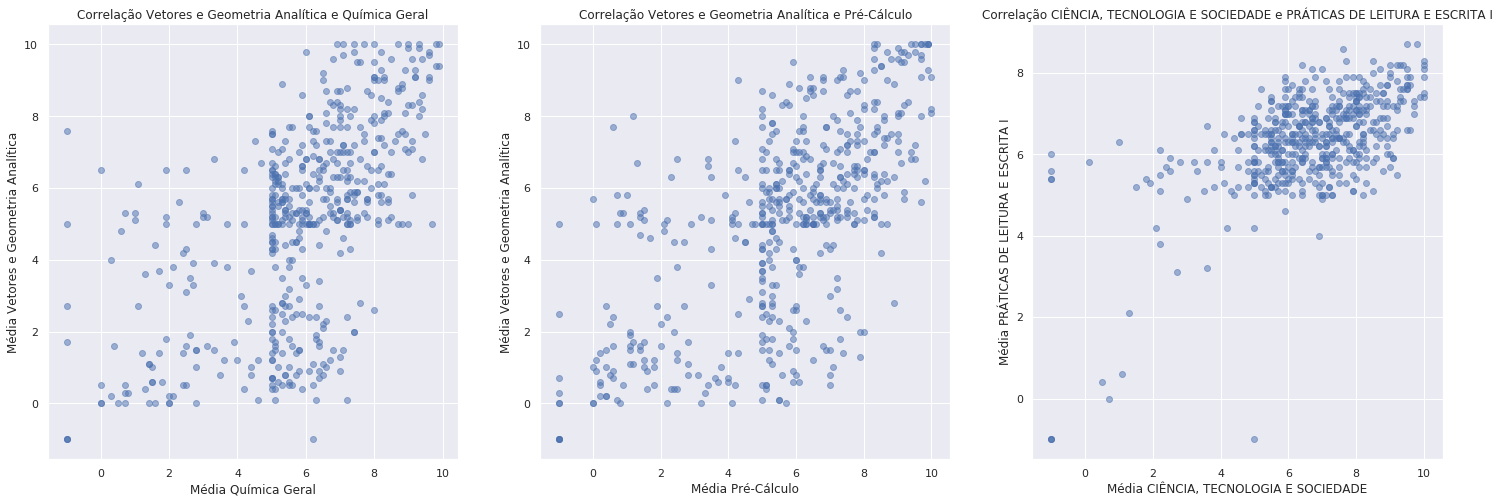

In [40]:

import matplotlib.pyplot as plt
#fig, ((ax1, ax2,ax3)) = plt.subplots(1, 3, sharex=True, sharey=True)
plt.figure(figsize=(25,8))
plt.subplots_adjust(hspace=0.5)

ax1 = plt.subplot(1,3,1) # subplot(2,1,1) is active, plotting will be done there
plt.title('Correlação Vetores e Geometria Analítica e Química Geral')
plt.scatter(datasetNotas['QUÍMICA GERALnota'], datasetNotas['VETORES E GEOMETRIA ANALÍTICAnota'], alpha=0.5)
plt.xlabel('Média Química Geral')
plt.ylabel('Média Vetores e Geometria Analítica')

ax2 = plt.subplot(1,3,2) # subplot(2,1,2) is now active
plt.title('Correlação Vetores e Geometria Analítica e Pré-Cálculo')
plt.scatter(datasetNotas['PRÉ-CÁLCULOnota'], datasetNotas['VETORES E GEOMETRIA ANALÍTICAnota'], alpha=0.5)
plt.xlabel('Média Pré-Cálculo')
plt.ylabel('Média Vetores e Geometria Analítica')

ax3 = plt.subplot(1,3,3) # subplot(2,1,2) is now active
plt.title("Correlação CIÊNCIA, TECNOLOGIA E SOCIEDADE e PRÁTICAS DE LEITURA E ESCRITA I")
plt.scatter(datasetNotas['CIÊNCIA, TECNOLOGIA E SOCIEDADEnota'], datasetNotas['PRÁTICAS DE LEITURA E ESCRITA Inota'], alpha=0.5)
plt.xlabel('Média CIÊNCIA, TECNOLOGIA E SOCIEDADE')
plt.ylabel('Média PRÁTICAS DE LEITURA E ESCRITA I')

plt.savefig('correlacoes.png', format='png')
plt.show()
    


In [57]:
#Aplicar o algoritmo de Naive Bayes https://www.dataquest.io/blog/sci-kit-learn-tutorial/
#Escolhi só a coluna situação para fazer essa análise
datasetBayes = tabela2[["matricula",'CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao', 'PRÁTICAS DE LEITURA E ESCRITA Isituacao', 'QUÍMICA GERALsituacao', 'CÁLCULO Isituacao', 'VETORES E GEOMETRIA ANALÍTICAsituacao', 'PRÉ-CÁLCULOsituacao','LÓGICA DE PROGRAMAÇÃOsituacao' ]]
datasetBayes

,matricula,"CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao",PRÁTICAS DE LEITURA E ESCRITA Isituacao,QUÍMICA GERALsituacao,CÁLCULO Isituacao,VETORES E GEOMETRIA ANALÍTICAsituacao,PRÉ-CÁLCULOsituacao,LÓGICA DE PROGRAMAÇÃOsituacao
0,2016015699,CANCELADO,CANCELADO,CANCELADO,CANCELADO,CANCELADO,CANCELADO,REPROVADO
1,2016097406,REPROVADO POR MÉDIA E POR FALTAS,REPROVADO,APROVADO POR NOTA,REPROVADO POR MÉDIA E POR FALTAS,REPROVADO POR NOTA,APROVADO POR NOTA,REPROVADO
2,20160142011,REPROVADO,REPROVADO POR MÉDIA E POR FALTAS,REPROVADO POR MÉDIA E POR FALTAS,REPROVADO,REPROVADO,APROVADO POR NOTA,REPROVADO POR MÉDIA E POR FALTAS
3,20160159117,CANCELADO,CANCELADO,CANCELADO,CANCELADO,CANCELADO,CANCELADO,CANCELADO
4,20160159180,APROVADO POR NOTA,APROVADO POR NOTA,APROVADO POR NOTA,REPROVADO,REPROVADO,APROVADO POR NOTA,CANCELADO
5,20170003414,APROVADO,APROVADO POR NOTA,APROVADO,REPROVADO POR MÉDIA E POR FALTAS,APROVADO POR NOTA,APROVADO,APROVADO
6,20170030494,APROVADO POR NOTA,APROVADO POR NOTA,APROVADO,REPROVADO,APROVADO POR NOTA,APROVADO POR NOTA,REPROVADO
7,20170030538,APROVADO,APROVADO POR NOTA,APROVADO,APROVADO POR NOTA,APROVADO,APROVADO POR NOTA,APROVADO
8,20170030556,APROVADO POR NOTA,APROVADO POR NOTA,APROVADO POR NOTA,REPROVADO,REPROVADO,REPROVADO,APROVADO
9,20170030618,APROVADO,APROVADO,APROVADO,REPROVADO,APROVADO,APROVADO,APROVADO


In [58]:
# colocar os aprova e reprovados na mesma categoria
datasetBayes = datasetBayes.replace(to_replace = 'APROVADO POR NOTA', value= "APROVADO")
datasetBayes = datasetBayes.replace(to_replace = ['REPROVADO POR MÉDIA E POR FALTAS',"REPROVADO POR NOTA"], value= "REPROVADO")
datasetBayes

,matricula,"CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao",PRÁTICAS DE LEITURA E ESCRITA Isituacao,QUÍMICA GERALsituacao,CÁLCULO Isituacao,VETORES E GEOMETRIA ANALÍTICAsituacao,PRÉ-CÁLCULOsituacao,LÓGICA DE PROGRAMAÇÃOsituacao
0,2016015699,CANCELADO,CANCELADO,CANCELADO,CANCELADO,CANCELADO,CANCELADO,REPROVADO
1,2016097406,REPROVADO,REPROVADO,APROVADO,REPROVADO,REPROVADO,APROVADO,REPROVADO
2,20160142011,REPROVADO,REPROVADO,REPROVADO,REPROVADO,REPROVADO,APROVADO,REPROVADO
3,20160159117,CANCELADO,CANCELADO,CANCELADO,CANCELADO,CANCELADO,CANCELADO,CANCELADO
4,20160159180,APROVADO,APROVADO,APROVADO,REPROVADO,REPROVADO,APROVADO,CANCELADO
5,20170003414,APROVADO,APROVADO,APROVADO,REPROVADO,APROVADO,APROVADO,APROVADO
6,20170030494,APROVADO,APROVADO,APROVADO,REPROVADO,APROVADO,APROVADO,REPROVADO
7,20170030538,APROVADO,APROVADO,APROVADO,APROVADO,APROVADO,APROVADO,APROVADO
8,20170030556,APROVADO,APROVADO,APROVADO,REPROVADO,REPROVADO,REPROVADO,APROVADO
9,20170030618,APROVADO,APROVADO,APROVADO,REPROVADO,APROVADO,APROVADO,APROVADO


In [0]:
#Criar um arquivo csv com os dados categoricos
datasetBayes.to_csv('datasetcategorico.csv')

In [60]:
#Quantidade de alunos total
datasetBayes.info()
#Quantidade de alunos por desempenho
datasetBayes["LÓGICA DE PROGRAMAÇÃOsituacao"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 8 columns):
matricula                                  521 non-null int64
CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao    521 non-null object
PRÁTICAS DE LEITURA E ESCRITA Isituacao    521 non-null object
QUÍMICA GERALsituacao                      521 non-null object
CÁLCULO Isituacao                          521 non-null object
VETORES E GEOMETRIA ANALÍTICAsituacao      521 non-null object
PRÉ-CÁLCULOsituacao                        521 non-null object
LÓGICA DE PROGRAMAÇÃOsituacao              521 non-null object
dtypes: int64(1), object(7)
memory usage: 32.6+ KB


APROVADO       323
REPROVADO      129
CANCELADO       46
INDEFERIDO      15
DESISTENCIA      5
TRANCADO         3
Name: LÓGICA DE PROGRAMAÇÃOsituacao, dtype: int64

In [61]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
datasetBayes['CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao'] = le.fit_transform(datasetBayes['CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao'])
datasetBayes['PRÁTICAS DE LEITURA E ESCRITA Isituacao'] = le.fit_transform(datasetBayes['PRÁTICAS DE LEITURA E ESCRITA Isituacao'])
datasetBayes['VETORES E GEOMETRIA ANALÍTICAsituacao']   = le.fit_transform(datasetBayes['VETORES E GEOMETRIA ANALÍTICAsituacao'])
datasetBayes['QUÍMICA GERALsituacao']                   = le.fit_transform(datasetBayes['QUÍMICA GERALsituacao'])
datasetBayes['LÓGICA DE PROGRAMAÇÃOsituacao']           = le.fit_transform(datasetBayes['LÓGICA DE PROGRAMAÇÃOsituacao'])
datasetBayes['PRÉ-CÁLCULOsituacao']                     = le.fit_transform(datasetBayes['PRÉ-CÁLCULOsituacao'])
datasetBayes['CÁLCULO Isituacao']                       = le.fit_transform(datasetBayes['CÁLCULO Isituacao'])
#display the initial records
datasetBayes


,matricula,"CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao",PRÁTICAS DE LEITURA E ESCRITA Isituacao,QUÍMICA GERALsituacao,CÁLCULO Isituacao,VETORES E GEOMETRIA ANALÍTICAsituacao,PRÉ-CÁLCULOsituacao,LÓGICA DE PROGRAMAÇÃOsituacao
0,2016015699,1,1,1,1,1,1,4
1,2016097406,4,3,0,4,4,0,4
2,20160142011,4,3,3,4,4,0,4
3,20160159117,1,1,1,1,1,1,1
4,20160159180,0,0,0,4,4,0,1
5,20170003414,0,0,0,4,0,0,0
6,20170030494,0,0,0,4,0,0,4
7,20170030538,0,0,0,0,0,0,0
8,20170030556,0,0,0,4,4,4,0
9,20170030618,0,0,0,4,0,0,0


In [0]:
datasetBayes.to_csv('dataset.csv')

In [62]:
copy = datasetBayes.drop("matricula", axis=1)
cols = copy.columns
data = copy[cols]
#retirar a coluna LÓGICA DE PROGRAMAÇÃOsituacao pq é a coluna que queremos prever
target = copy['LÓGICA DE PROGRAMAÇÃOsituacao']
data.head(n=2)

,"CIÊNCIA, TECNOLOGIA E SOCIEDADEsituacao",PRÁTICAS DE LEITURA E ESCRITA Isituacao,QUÍMICA GERALsituacao,CÁLCULO Isituacao,VETORES E GEOMETRIA ANALÍTICAsituacao,PRÉ-CÁLCULOsituacao,LÓGICA DE PROGRAMAÇÃOsituacao
0,1,1,1,1,1,1,4
1,4,3,0,4,4,0,4


In [0]:
#import the necessary module
from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [108]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
#gnb = MultinomialNB()
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.9745222929936306


In [111]:
print(confusion_matrix(target_test, pred, labels=[0,1,2,3,4,5]))


[[98  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  4  1  0]
 [ 0  0  0  0 39  0]
 [ 0  0  0  0  1  0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


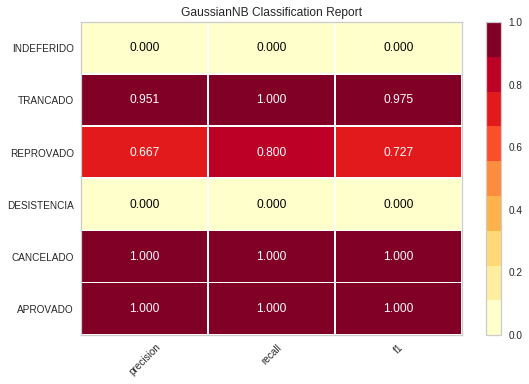

In [102]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['APROVADO','CANCELADO', 'DESISTENCIA', 'REPROVADO','TRANCADO',"INDEFERIDO"])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [80]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.9299363057324841


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [81]:
confusion_matrix(target_test, pred, labels=[0,1,2,3,4,5])

array([[98,  0,  0,  0,  0,  0],
       [ 3,  9,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  1,  0]])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


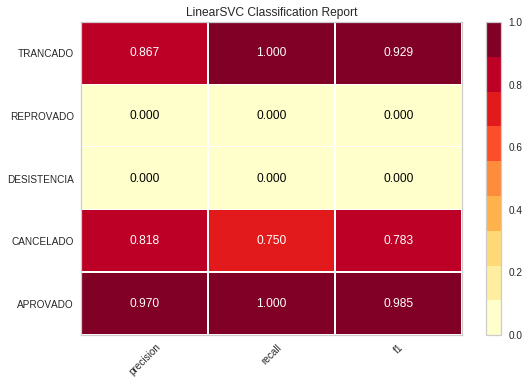

In [82]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=['APROVADO','CANCELADO', 'DESISTENCIA', 'REPROVADO','TRANCADO'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [70]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.9235668789808917


In [0]:
confusion_matrix(target_test, pred, labels=[0,1,2,3,4,5])

In [0]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['APROVADO','CANCELADO', 'DESISTENCIA', 'REPROVADO','TRANCADO'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [71]:
#import necessary modules
from sklearn import tree
from sklearn.metrics import accuracy_score
#create object of the lassifier
tree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=5)
#Train the algorithm
tree.fit(data_train, target_train)
# predict the response
pred = tree.predict(data_test)
# evaluate accuracy
print ("tree accuracy score : ",accuracy_score(target_test, pred))

tree accuracy score :  0.9808917197452229


In [0]:
confusion_matrix(target_test, pred, labels=[0,1,2,3,4,5])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


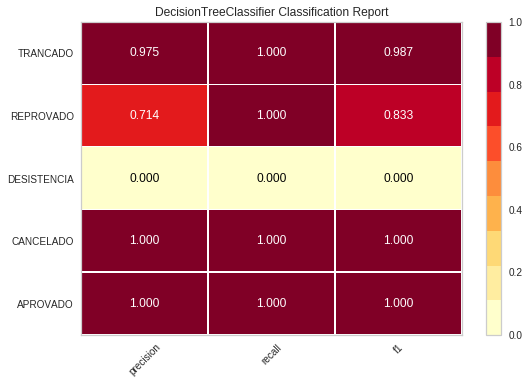

In [75]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(tree, classes=['APROVADO','CANCELADO', 'DESISTENCIA', 'REPROVADO','TRANCADO'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data